# Module2c: The Kernel

"Filters are devices for picking and choosing - for retaining things that you want while getting rid of things that you don't: coffee filters separate the coffee from the grounds, gravel filters let the small stones through and retain the large ones, audio filters take out the crackle and hiss, Ray-Bans filter out sunlight, and rose-tinted spectacles let you see the world in whatever way you like." - William J. Mitchell (The Reconfigured Eye)
****

The Threshold filter from Module 2 modifies the image by changing pixel values depending on if it is above or below a dividing point.  Each discrete pixel was modified in insolation.  

Another way to modify an image is to change the pixel value in relation its neighboring pixels.  To accomplish this we use a matrix of numbers called a **Convolution Kernel**.  

**Sharpen** and **Blur** are two common kernels.

<b>Sharpen</b> emphasizes differences in adjacent pixels.<br>
<b>Blur</b> de-emphasizes differences in adjacent pixels.

**3x3 Sharpen Kernel:**

$$\begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$$ 


**3x3 Blur Kernel:**

$$\begin{bmatrix} 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \\ 1/9 & 1/9 & 1/9 \end{bmatrix}$$


A kernel is normalized if the sum of the values is 1. If the sum is above 1, the image becomes lighter, and if it’s below 1, the image becomes darker.

The kernel is placed over the image and centered on the middle pixel.  The middle value plus the neighboring values are multiplied by the corresponding kernel values and then summed up to set the pixel value.  Below is the process for a 3x3 Blur kernel applied to a 3x3 section of a black and white image. <p>

$$
Kernel
\begin{bmatrix}
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9\\
1/9 & 1/9 & 1/9
\end{bmatrix} 
X
\begin{bmatrix}
255 & 226 & 153\\ 
226 & 153 & 0\\
153 & 0 & 0
\end{bmatrix}
Image
$$

(255 * 1/9) + (226 * 1/9) + (153 * 1/9) + <br>
(226* 1/9) + (153 * 1/9) + (0 * 1/9) + <br>
(153 * 1/9) + (0 * 1/9) + (0 * 1/9) = 129.426 ≈ 129

Remember we can only have whole number (integer) values so round it to 129.  

To find the values for a the whole image repeat this for every pixel in the image.  You might realize that there is a problem when you hit the edges of the image.  You are missing  pixel values to multiply with your kernel.  To simplify the following examples we are going to skip over dealing with the edge pixels but we will discuss the solution below.

In [36]:
# Code for toy example of convolution

import numpy as np

kernel = np.array(([.111,.111,.111],
                   [.111,.111,.111],
                   [.111,.111,.111]),
                   dtype=np.float32)

image = np.array(([255,226,153],
                  [226,153,0],
                  [153,0,0]),
                  dtype=np.float32)

# Convolution Step.
convolve_image = int(np.sum(np.multiply(image, kernel)))

print(convolve_image)

129


<img src='../Graphics/full_padding_no_strides.webp'><p>
<b>Stride</b> denotes how many pixels we are moving in each step of convolution.

<b>Padding</b> is the process of adding pixels to the frame of the image to allow for a minimized reduction of size in the output image. Roughly, it is a way of increasing the size of an image, to counteract the fact that stride reduces the size.<p>

+ Zero/Same Padding: Adds zeros around the border of the image.
+ Replicate Padding: The border pixels of the image are replicated.
For instance, if the leftmost pixel values are [10, 20, 30], the padding will be [10, 10, 10, 20, 30, 30, 30].

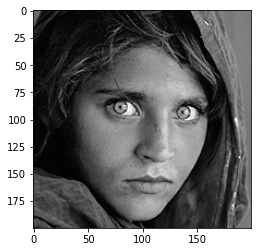

In [18]:
# import and show image
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

# Import image
img = cv2.imread('Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')


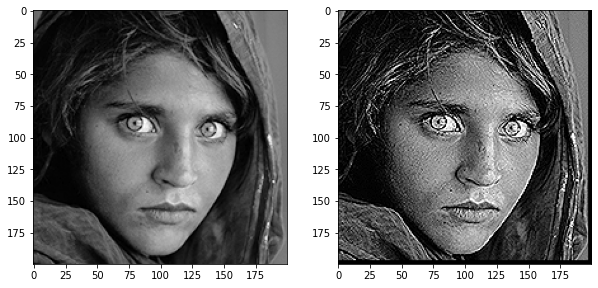

In [19]:
# Implementation of convolution

# Code for 3x3 kernel with convolution. No Padding. Stride = 1.
# To perform convolution on the whole image padding needs to be added.
def convolve(image, kernel):

    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1]
    
    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    # Empty array for our output image. Size of the input image.
    output = np.zeros((image_height, image_width))

    # All the rows except for the edge pixels.
    for y in range(image_height - kernel_height):
        # All the pixels except for the edge pixels.
        for x in range(image_width - kernel_width):

            # Mat or kernel frame. Part of the image to perform convolution.
            mat = image[y:y+kernel_height, x:x+kernel_width]

            # Perform convolution.
            output[y,x] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers clip to 0->255 range.
    if(np.min(output) < 0):
        output = np.clip(output,0,255)

    # return image
    return output

# Kernels
sharpen = np.array(([0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]),
                    dtype=np.float32)

blur = np.array(([.111,.111,.111],
                   [.111,.111,.111],
                   [.111,.111,.111]),
                   dtype=np.float32)

edge = np.array(([-1,-1,-1],
                 [-1,8,-1],
                 [-1,-1,-1]),
                 dtype=np.float32)

# Send image to convolution function.
convolve_image = convolve(img, sharpen)

# Set figure size
fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# Right Image
fig.add_subplot(1,2,2)
plt.imshow(convolve_image, cmap='gray')

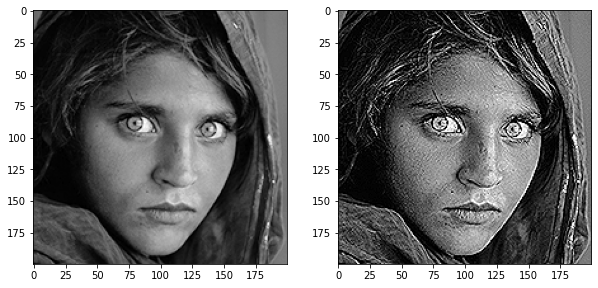

In [15]:
# OpenCV implementation

#Import the image again. cv2.filter2D performs convolution on the image with the provided kernel.
# -1 denotes the same channel depth as the input image.
imgConv2 = cv2.filter2D(img,-1, sharpen)

# Plot size
fig = plt.figure(figsize = (10,10))

# Create subplots for each image
# Left Image
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(imgConv2, cmap='gray')

### Gaussian Blur

<img src='../Graphics/Guassian.png' width=600><p>

**Low-pass filter**

Simply apply a Gaussian blur to the image. The result is a smoothed image where fine details are suppressed.

**High-pass filter**

First, apply a Gaussian blur to the image to get a low-pass version.
Then, subtract this low-pass version from the original image. The result will be an image that retains only the fine details.

<img src='../Graphics/High_Pass_Low_Pass.png' width=800><p>

In [31]:
import numpy as np

# Estimated Gaussian Kernel

gaussian_est_kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

# For a 3x3 kernel, there's a limitation on how much "spread" we can represent due to its small size.
# A value of sigma=0.85 is a heuristic that provides a reasonable blur effect for such a small kernel.
# However, the choice isn't absolute, and other values can be used based on specific requirements.
def gaussian_kernel(kernel_size=3, sigma=0.85):
    if sigma is None:
        sigma = kernel_size / 6.0  # Some heuristic
    
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) *
                     np.exp(-((x-(kernel_size-1)/2)**2 + (y-(kernel_size-1)/2)**2) / (2*sigma**2)),
        (kernel_size, kernel_size)
    )
    
    return kernel / kernel.sum()

kernel = gaussian_kernel()
#Actual gaussian kernel function
print("Gaussian kernel:\n",kernel)
#Estimated gaussian kernel function
print("Estimated Gaussian kernel:\n",gaussian_est_kernel)


Gaussian kernel:
 [[0.06256912 0.12499996 0.06256912]
 [0.12499996 0.24972366 0.12499996]
 [0.06256912 0.12499996 0.06256912]]
Estimated Gaussian kernel:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


### Exercises

**(1)** What is the pixel brightness value when the kernel is applied to the image?  Do you notice anything about the pixel value?  What happens if the sum of the kernel does not equal one?

$$
Kernel
\begin{bmatrix}
1/4 & 1/4 & 1/4\\
1/4 & 1/4 & 1/4\\
1/4 & 1/4 & 1/4
\end{bmatrix} 
X
\begin{bmatrix}
126 & 153 & 126\\ 
153 & 153 & 126\\
126 & 153 & 153
\end{bmatrix}
Image
$$

**(2)** Apply the edge filter to your image from the HSV in class project.  

**(3)** Create your own kernel and apply it to the same image. Describe the results.
